In [1]:
include("jl/init_default.jl");

17-פבר 09:34:25:INFO:root:N=74293025 min(m)=46.538624 max(m)=959026.75
17-פבר 09:34:25:INFO:root:rescaling masses
17-פבר 09:34:26:INFO:root:N=74293025 min(m)=50.036606 max(m)=1.0311101e6


In [11]:
include("jl/all.jl")
pop_realization()

In [12]:
opos_i = SharedArray(Float32, size(pos));

In [13]:
opos_i.s[:,:] = pos.s[:,:];

In [ ]:
optimize_2lpt_vs_pushed_pos!(rho, opos_i, pos, m, 0.01, 1.0, 0.21, 400);

17-פבר 09:43:59:INFO:root:opt2lpt start a_from=0.01 a_to=1.0 end_meandx=400 fracmov=0.21
17-פבר 09:44:00:INFO:root:sim2lpt start from a=0.01 to a=1.0


In [6]:
mean_std_dx_vs_pushed_pos(opos_i)

(2992.104f0,2285.9148f0)

In [7]:
kd = get_kd(pos);

In [30]:
to_rho!(opos_i,m, rho);
rho_to_1st_order_vel_pot!(rho);

In [31]:
get_1st_order_comoving_vel!(c, 0.01, 1, rho);
get_slope_std_smoothed(kd, real(c), vx, pos, 10000.0, 100000)

(0.09601778000578769,91.32295015321644)

In [32]:
pos.s[:,:] = opos_i.s[:,:]
simulate_zeld!(rho, pos, m, 0.01, 0.1);

17-פבר 09:04:51:INFO:root:simzel start from a=0.01 to a=0.1
17-פבר 09:05:13:INFO:root:simzel dim 1
17-פבר 09:05:22:INFO:root:simzel dim 2
17-פבר 09:05:30:INFO:root:simzel dim 3
17-פבר 09:05:38:INFO:root:simzel end


In [33]:
to_rho!(pos,m, rho);

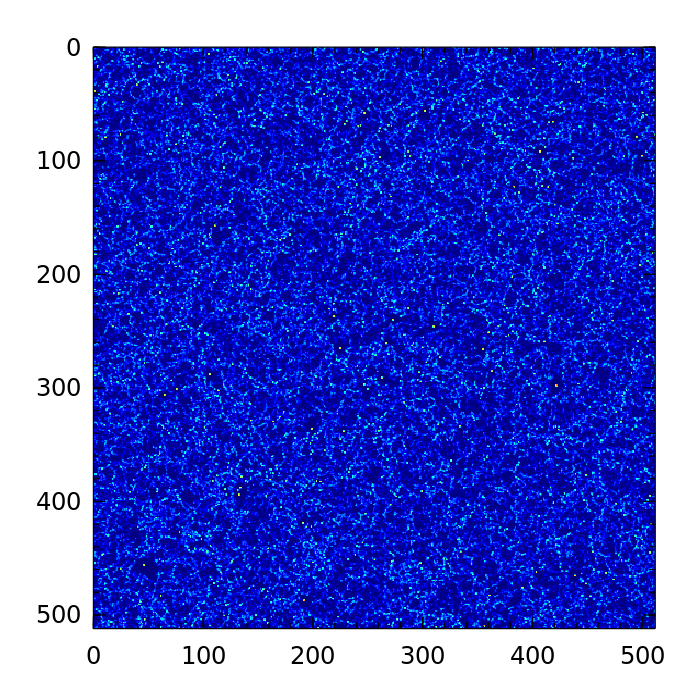

In [34]:
imrho = real(rho[:,:,254]) + real(rho[:,:,255]) + real(rho[:,:,256])
Winston.set_default_plot_size(700,700)
imagesc(log10(1e-8+imrho))

In [35]:
to_delta!(rho);

In [36]:
corr = get_correlation(rho);

In [37]:
pop_realization()
to_delta!(rho)
corr_org = get_correlation(rho);

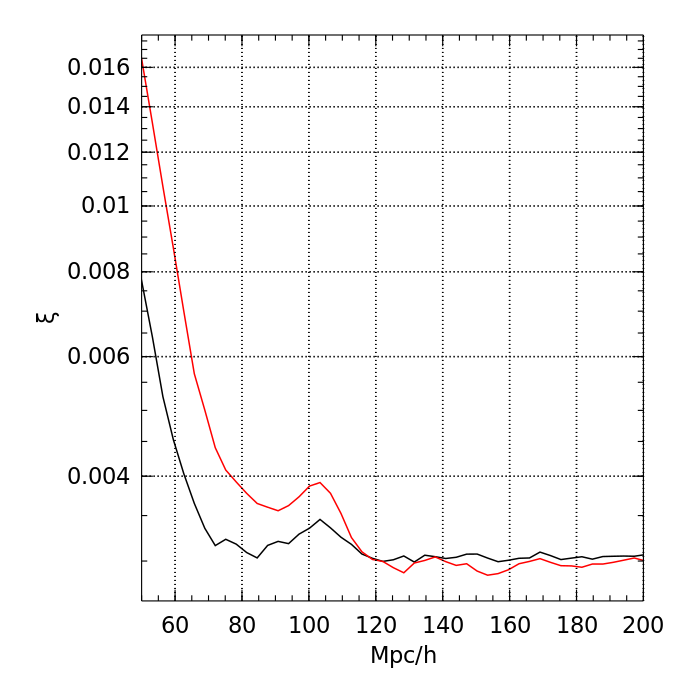

In [38]:
semilogy(xl/1000, corr*1.5)
hold(true)
semilogy(xl/1000, corr_org, "red")
hold(false)
xlim(50,200)
grid(true)
xlabel("Mpc/h")
ylabel("\\xi")